# Antonio Pagano

# Instructions

* Change "Your Name Here" to your name.
* Fill in the empty chunks with your code. 
* Do not add any code chunks in your final submission besides the ones already here. 
* Use **no** additional modules other than:
    - `numpy`
    - `matplotlib`

In [2]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1

Write a function called `sim_time_series(alpha, n)` that generates a correlated time series:

$$
x_{t+1} = \alpha x_t + \epsilon_t
$$

where $\epsilon_t \sim N(\mu = 0, \sigma^2 = 1)$.

The argument `alpha` is $\alpha$ and `n` is the number of observations. 

**Hint:** You will need a loop.

**Hint:** use `np.zeros()` to create the empty vector that will store your time series. 

In [3]:
# your code here
def sim_time_series(alpha,n):
    for i in range(0,n):
        error_normal=np.random.normal(0,1,n)
        tsvector=np.array(alpha*i+error_normal)
        return (tsvector)

Run your function with $\alpha = 0.5$ and $n = 300$, store the results in the object `ts`, then plot it. Label the axes.

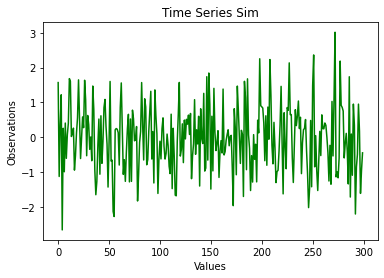

In [4]:
# your code here
ts=sim_time_series(.5,300)
plt.plot(ts, label = 'time series sim', color = 'green') 
plt.ylabel('Observations')
plt.xlabel('Values')
plt.title("Time Series Sim")
plt.show()

# Question 2

Create a list called `alphas` with the values -0.5, 0.5, and 0.9. 

Loop over that list to create three time series. Set $n = 300$ for each one. 

Your loop should plot each time series *on the same figure*. Label the axes. Include a legend. 

**Hint:** Where should `plt.plot()` go? Inside or outside the loop?

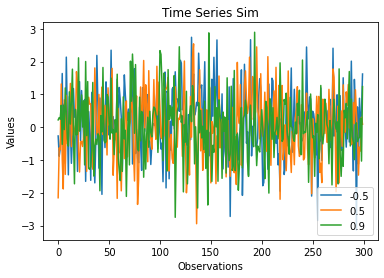

In [5]:
# your code here
alphas=[-.5,.5,.9]
for i in range(0,len(alphas)):
    timeseries=sim_time_series(i,300)
    plt.plot(timeseries, label = alphas[i])

plt.legend()
plt.xlabel('Observations')
plt.ylabel('Values')
plt.title("Time Series Sim")
plt.show()

    

# Question 3

Flip a biased coin where $P(heads = 0.75)$ 1000 times. Then confirm the coin is biased.

In [6]:
# your code here
weightedCoin = np.random.binomial(n=1, p = 0.75, size = 1000)
if np.mean(weightedCoin)<.48 or np.mean(weightedCoin)>.52 :
    print("This coin is biased")
else:
    print("This coin is not biased")

This coin is biased


# Question 4

Simulate 1000 draws from $x \sim U(0,1)$ and plot the histogram. Label the axes.

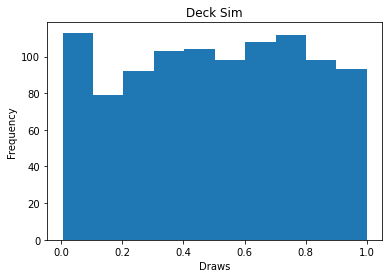

In [7]:
# your code here
deck=np.random.uniform(0,1,1000)
plt.hist(deck)
plt.xlabel("Draws")
plt.ylabel("Frequency")
plt.title("Deck Sim")
plt.show()

# Question 5

Simulate 1000 draws from $x \sim N(\mu = 10,\sigma^2 = 2)$ and plot the histogram. Label the axes.

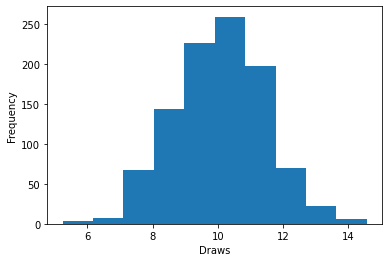

In [8]:
# your code here
chance=np.random.normal(10,np.sqrt(2),1000)
plt.hist(chance)
plt.xlabel("Draws")
plt.ylabel("Frequency")
plt.show()

# Question 6

We can think of statistical distributions as **emergent properties.**

That means they emerge from small interactions. 

What kind of process generates a Normal distribution? 

Write a function called `emergent_normal(n_agents, n_steps)`. 

This function will simulate the following process:

* Some number of agents (`n_agents`) stand shoulder-to-shoulder on a line
* Each one draws a number $r \sim U(0,1)$
    - if $r > 0.5$ the agent takes one step forward
    - otherwise the agent takes on step backward
    - repeat a certain number of times (`n_steps`)

In [10]:
# your code here
        
def emergent_normal(n_agents,n_steps):
    finalpositionlist=[]
    for agent in range(0,n_agents):
        position=0
        draws=np.random.uniform(0,1,n_steps)
        for draw in draws:
            if draw>.5:
                position=position+1
            else:
                position=position-1
        finalpositionlist.append(position)
    return finalpositionlist

    

Run your function with 10 agents and 100 steps, then plot the distribution. Label the axes.

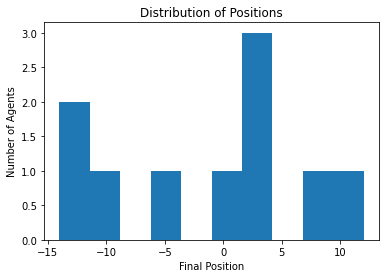

In [11]:
# your code here
randNormDist= emergent_normal(10,100)



plt.xlabel("Final Position")
plt.ylabel("Number of Agents")
plt.title("Distribution of Positions")
plt.hist(randNormDist)
plt.show()

Run your function with 10,000 agents and 100 steps, then plot the distribution. Label the axes.

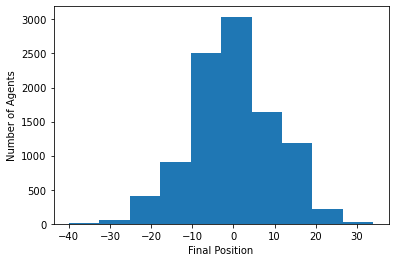

In [12]:
# your code here
randnormdist=emergent_normal(10000,100)
plt.xlabel("Final Position")
plt.ylabel("Number of Agents")
plt.hist(randnormdist)
plt.show()

# Question 7

Write a new function called `emergent_normal_vectorized(n_agents, n_steps)` that does the same simulation but in vectorized form.  

**Hint**: The new function should have only one loop.

**Hint**: How can you use the `size` argument in the random number generator and `np.where()` to your advantage? 

In [13]:
# your code here

def emergent_normal_vectorized(n_agents, n_steps):
    finalpositionlist=[]
    for agent in range(0,n_agents):
        draws = np.random.uniform(0, 1,n_steps)
        step = draws[np.where( draws > 0.5 )].size
        position=step-(n_steps-step)
        finalpositionlist.append(position)
    return finalpositionlist
        


Run your function with 10,000 agents and 100 steps, then plot the distribution.

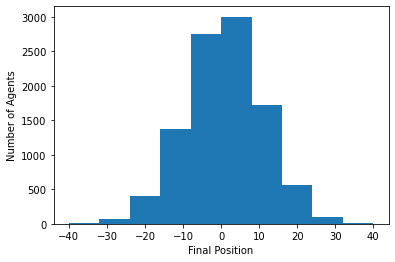

In [15]:
# your code here
rand_norm_dist=emergent_normal_vectorized(10000,100)
plt.xlabel("Final Position")
plt.ylabel("Number of Agents")
plt.hist(rand_norm_dist)
plt.show()

